# RNN experments 

In [8]:
%pip install torch > /dev/null
%matplotlib inline

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


torch.Size([1000, 50]) torch.Size([1000, 50])


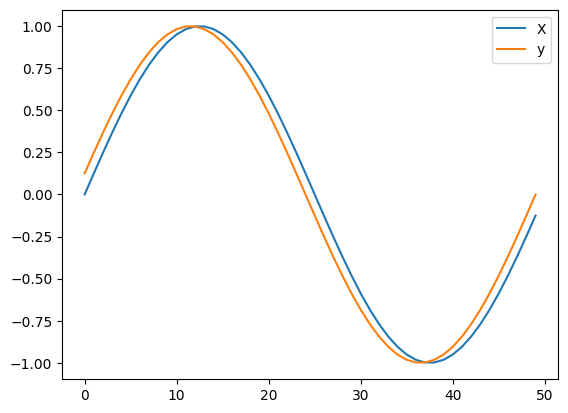

In [31]:
def generate_data(seq_length, num_samples):
    X = []
    y = []
    for i in range(num_samples):
        x = np.linspace(i * 2 * np.pi, (i + 1) * 2 * np.pi, seq_length + 1)
        sine_wave = np.sin(x)
        X.append(sine_wave[:-1])  
        y.append(sine_wave[1:])   
    return np.array(X), np.array(y)

seq_length = 50
num_samples = 1000
Xarr, yarr = generate_data(seq_length, num_samples)

X = torch.tensor(Xarr, dtype=torch.float32)
y = torch.tensor(yarr, dtype=torch.float32)

plt.plot(Xarr[0])
plt.plot(yarr[0])
plt.legend(['X', 'y'])

print(X.shape, y.shape)

In [32]:
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out)
        return out

input_size = 1
hidden_size = 30
output_size = 1
model = SimpleRNN(input_size, hidden_size, output_size)

In [36]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 300
for epoch in range(num_epochs):
    model.train()
    outputs = model(X.unsqueeze(2))
    loss = criterion(outputs, y.unsqueeze(2))
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/300], Loss: 0.0014
Epoch [20/300], Loss: 0.0024
Epoch [30/300], Loss: 0.0010
Epoch [40/300], Loss: 0.0008
Epoch [50/300], Loss: 0.0006
Epoch [60/300], Loss: 0.0005
Epoch [70/300], Loss: 0.0004
Epoch [80/300], Loss: 0.0003
Epoch [90/300], Loss: 0.0005
Epoch [100/300], Loss: 0.0004
Epoch [110/300], Loss: 0.0004
Epoch [120/300], Loss: 0.0003
Epoch [130/300], Loss: 0.0003
Epoch [140/300], Loss: 0.0002
Epoch [150/300], Loss: 0.0002
Epoch [160/300], Loss: 0.0002
Epoch [170/300], Loss: 0.0002
Epoch [180/300], Loss: 0.0015
Epoch [190/300], Loss: 0.0007
Epoch [200/300], Loss: 0.0004
Epoch [210/300], Loss: 0.0003
Epoch [220/300], Loss: 0.0003
Epoch [230/300], Loss: 0.0003
Epoch [240/300], Loss: 0.0002
Epoch [250/300], Loss: 0.0002
Epoch [260/300], Loss: 0.0002
Epoch [270/300], Loss: 0.0002
Epoch [280/300], Loss: 0.0002
Epoch [290/300], Loss: 0.0002
Epoch [300/300], Loss: 0.0002


In [37]:
X.shape, X.unsqueeze(2).shape

(torch.Size([1000, 50]), torch.Size([1000, 50, 1]))

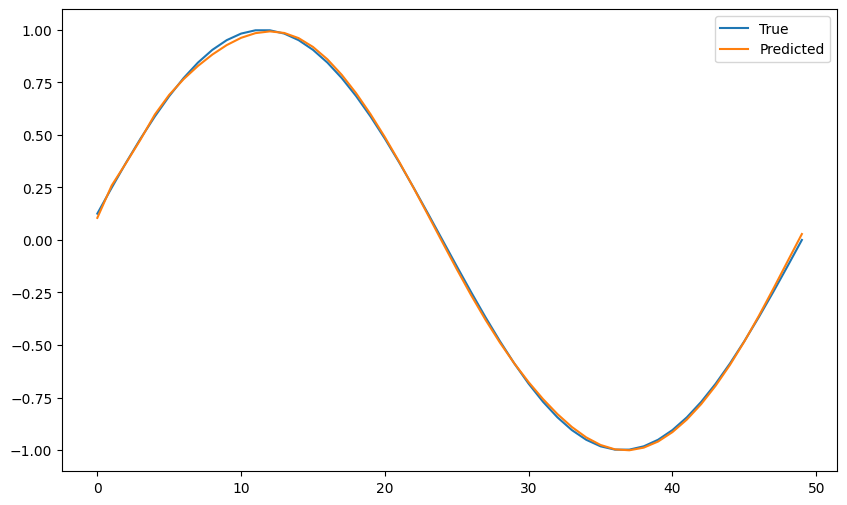

In [38]:
model.eval()
with torch.no_grad():
    predictions = model(X.unsqueeze(2)).squeeze(2).numpy()

plt.figure(figsize=(10, 6))
plt.plot(y[0].numpy(), label='True')
plt.plot(predictions[0], label='Predicted')
plt.legend()
plt.show()